## IMPORTI

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string

## Uvoz podataka


In [2]:
data = pd.read_csv('Machine learning/letter_csv.csv')

In [22]:
#data.head()

## Priprema podataka
(podela uzorka, slaganje u kolone)

In [6]:
data.rename(columns={"class":"letter"}, inplace=True)

In [15]:
x = np.array(data)[:,0:16]

In [18]:
y = np.array(data['letter'])[:]

In [21]:
x_train = x[:16000,:]
x_test = x[16001:,:]
y_train = y[:16000]
y_test = y[16001:]


## Ucitavanje modela i interpolacija

In [23]:
from sklearn import svm

In [24]:
model = svm.SVC(C=3)

In [25]:
model.fit(x_train, y_train)

SVC(C=3)

In [27]:
y_pred = model.predict(x_test)
y_pred

array(['T', 'P', 'D', ..., 'O', 'L', 'Q'], dtype=object)

## Metrika

In [29]:
model.score(x_test, y_test)

0.9534883720930233

In [30]:
from sklearn.metrics import confusion_matrix

In [39]:
#priprema indeksa i kolona
x_label = list(string.ascii_uppercase[0:26])
y_label = list("Predicted: " + i for i in x_label)

In [42]:
#da vidimo stack slova kako izgleda
stack = np.column_stack([y_pred, y_test])

In [43]:
stack

array([['T', 'T'],
       ['P', 'P'],
       ['D', 'D'],
       ...,
       ['O', 'O'],
       ['L', 'L'],
       ['Q', 'Q']], dtype=object)

In [50]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=x_label, columns=y_label)

<IPython.core.display.Javascript object>

<AxesSubplot:>

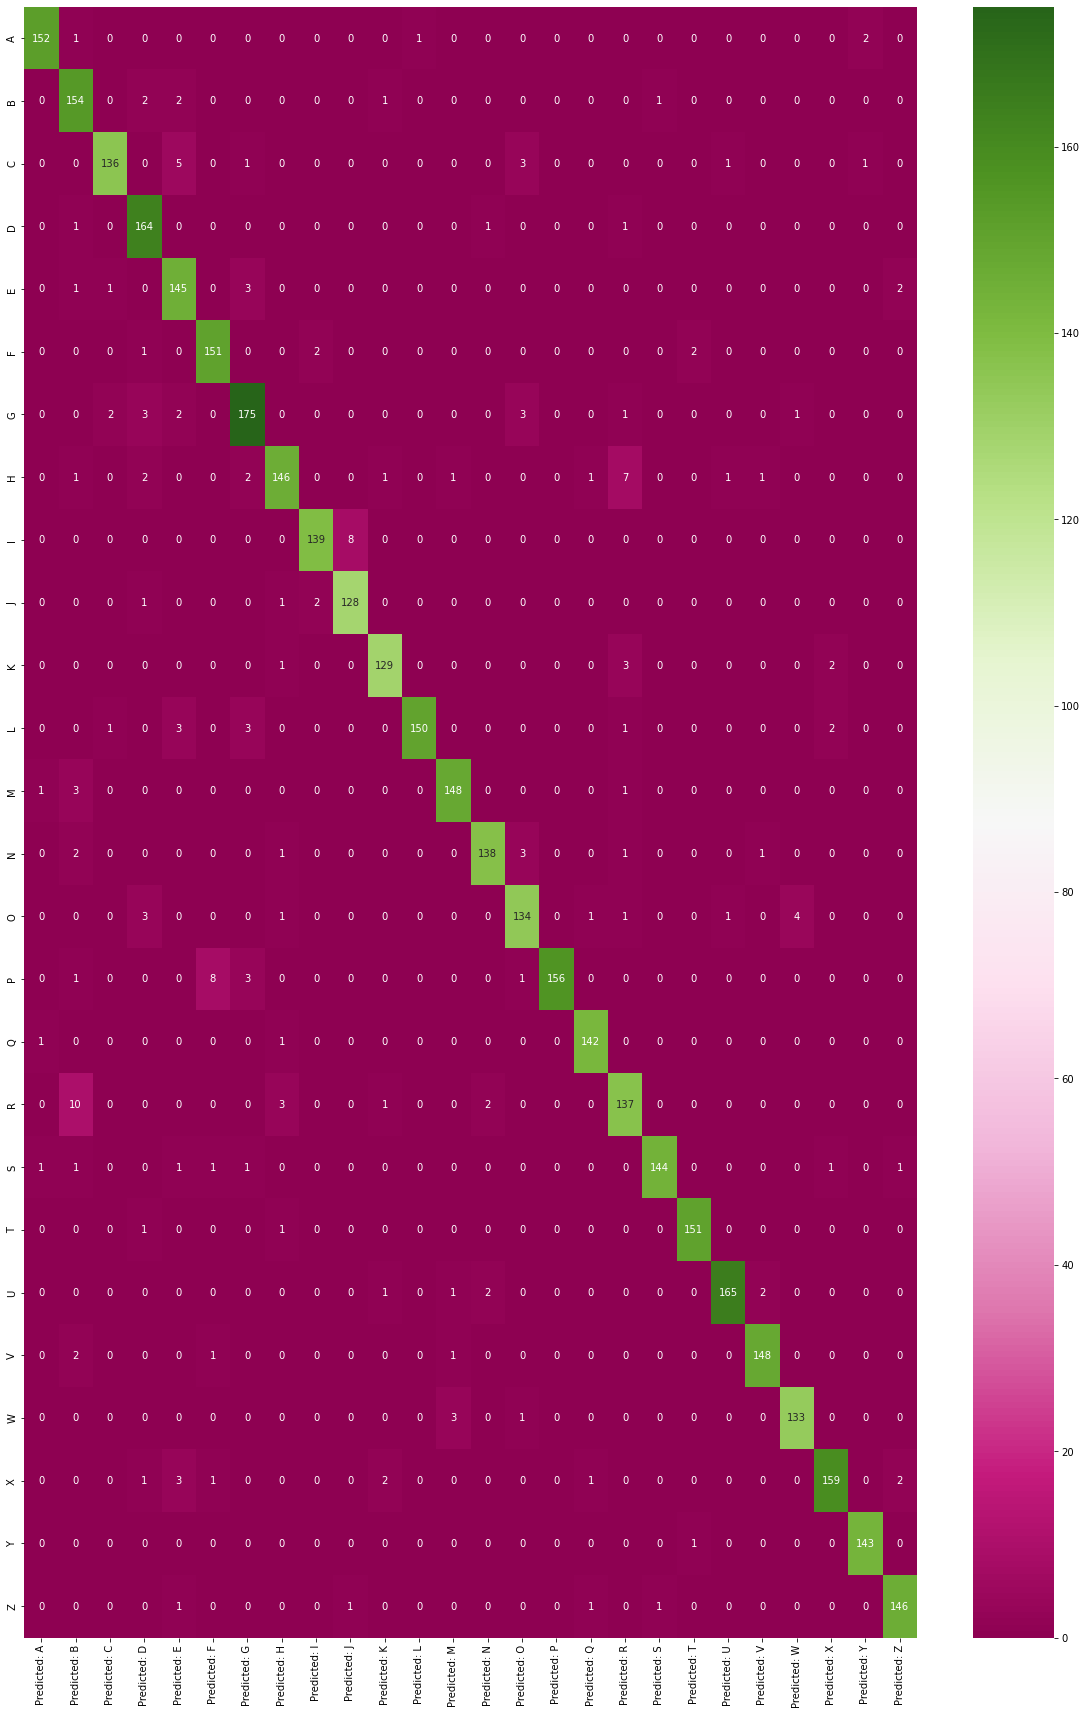

In [51]:
plt.figure(figsize=(20,30))
sns.heatmap(cm_df, annot=True, cmap='PiYG', fmt='g')
plt.show()

In [54]:
model.score(x_test, y_test)

0.9534883720930233